In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("./data/iris.csv")
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


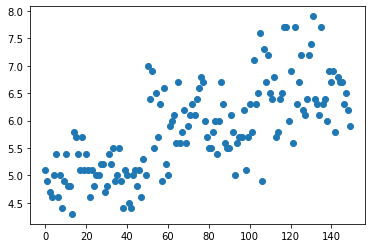

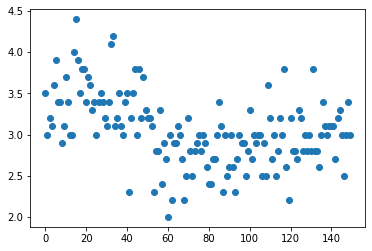

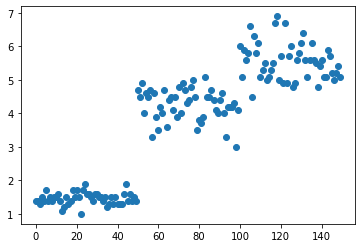

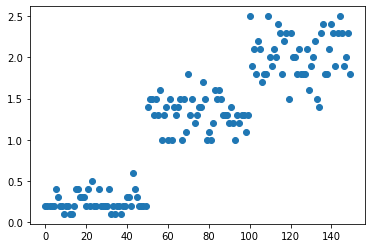

In [3]:
for i in range(4):
    plt.scatter(np.arange(150),data.iloc[:,i].values)
    plt.show()

In [6]:
from sklearn.preprocessing import KBinsDiscretizer
X = data.iloc[:,:-1]
est = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
est.fit(X)

Xt = est.transform(X)

Xt = Xt.astype(np.int)
data2 = data
data2.iloc[:,:-1] = Xt

In [7]:
print(np.unique(data["species"],return_counts=True))

(array(['setosa', 'versicolor', 'virginica'], dtype=object), array([50, 50, 50]))


In [8]:
np.unique(data["species"])

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [11]:
prob_dict = {}


for feature in data2.columns[:-1]: 
    prob_dict[feature] = {}
    for class_name in np.unique(data["species"]):
        prob_dict[feature][class_name] = np.zeros(3)
for class_name in np.unique(data["species"]):
    prob_dict[class_name] = 0

In [12]:
prob_dict

{'sepal_length': {'setosa': array([0., 0., 0.]),
  'versicolor': array([0., 0., 0.]),
  'virginica': array([0., 0., 0.])},
 'sepal_width': {'setosa': array([0., 0., 0.]),
  'versicolor': array([0., 0., 0.]),
  'virginica': array([0., 0., 0.])},
 'petal_length': {'setosa': array([0., 0., 0.]),
  'versicolor': array([0., 0., 0.]),
  'virginica': array([0., 0., 0.])},
 'petal_width': {'setosa': array([0., 0., 0.]),
  'versicolor': array([0., 0., 0.]),
  'virginica': array([0., 0., 0.])},
 'setosa': 0,
 'versicolor': 0,
 'virginica': 0}

In [26]:
a = np.random.rand(3,3)

In [29]:
a

array([[0.2674953 , 0.39894679, 0.12529607],
       [0.07617324, 0.6798981 , 0.99031883],
       [0.82936499, 0.47860999, 0.48151797]])

In [36]:
a[[0,0,1],[0,1,2]]

array([0.2674953 , 0.39894679, 0.99031883])

In [10]:

#for feature in data2.columns[:-1]:
for i in data2.values:
    for x,feature in zip(i[:-1],data2.columns[:-1]):
        prob_dict[feature][i[-1]][x]+=1
    prob_dict[i[-1]]+=1

In [11]:
prob_dict

{'sepal_length': {'setosa': array([45.,  5.,  0.]),
  'versicolor': array([ 6., 38.,  6.]),
  'virginica': array([ 1., 27., 22.])},
 'sepal_width': {'setosa': array([ 1., 34., 15.]),
  'versicolor': array([21., 29.,  0.]),
  'virginica': array([11., 36.,  3.])},
 'petal_length': {'setosa': array([50.,  0.,  0.]),
  'versicolor': array([ 0., 48.,  2.]),
  'virginica': array([ 0.,  6., 44.])},
 'petal_width': {'setosa': array([50.,  0.,  0.]),
  'versicolor': array([ 0., 48.,  2.]),
  'virginica': array([ 0.,  4., 46.])},
 'setosa': 50,
 'versicolor': 50,
 'virginica': 50}

In [12]:
for feature in data2.columns[:-1]: 
    for class_name in np.unique(data["species"]):
        prob_dict[feature][class_name]/=prob_dict[class_name]
for class_name in np.unique(data["species"]):
    prob_dict[class_name]/=len(data)

In [13]:
prob_dict

{'sepal_length': {'setosa': array([0.9, 0.1, 0. ]),
  'versicolor': array([0.12, 0.76, 0.12]),
  'virginica': array([0.02, 0.54, 0.44])},
 'sepal_width': {'setosa': array([0.02, 0.68, 0.3 ]),
  'versicolor': array([0.42, 0.58, 0.  ]),
  'virginica': array([0.22, 0.72, 0.06])},
 'petal_length': {'setosa': array([1., 0., 0.]),
  'versicolor': array([0.  , 0.96, 0.04]),
  'virginica': array([0.  , 0.12, 0.88])},
 'petal_width': {'setosa': array([1., 0., 0.]),
  'versicolor': array([0.  , 0.96, 0.04]),
  'virginica': array([0.  , 0.08, 0.92])},
 'setosa': 0.3333333333333333,
 'versicolor': 0.3333333333333333,
 'virginica': 0.3333333333333333}

In [38]:
probs = np.zeros((data2.shape[0],3))

for i in data2.iloc:
    pr = 1
    for j in data2.columns[:-1]:
        for e,specie in enumerate(np.unique(data["species"])):
            pr
        
    """
    for j,specie in enumerate(np.unique(data["species"])):
        print(j,specie)
        prob_dict[]
    """
    """
    for x,feature in zip(i[:-1],data2.columns[:-1]):

        prob_dict[feature][i[-1]][x]+=1
    prob_dict[i[-1]]+=1
    """

sepal_length         0
sepal_width          1
petal_length         0
petal_width          0
species         setosa
Name: 0, dtype: object
sepal_length
sepal_width
petal_length
petal_width
sepal_length         0
sepal_width          1
petal_length         0
petal_width          0
species         setosa
Name: 1, dtype: object
sepal_length
sepal_width
petal_length
petal_width
sepal_length         0
sepal_width          1
petal_length         0
petal_width          0
species         setosa
Name: 2, dtype: object
sepal_length
sepal_width
petal_length
petal_width
sepal_length         0
sepal_width          1
petal_length         0
petal_width          0
species         setosa
Name: 3, dtype: object
sepal_length
sepal_width
petal_length
petal_width
sepal_length         0
sepal_width          2
petal_length         0
petal_width          0
species         setosa
Name: 4, dtype: object
sepal_length
sepal_width
petal_length
petal_width
sepal_length         0
sepal_width          2
petal_length  

In [26]:
probs

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0

In [21]:
data2

,sepal_length,sepal_width,petal_length,petal_width,species
0,0,1,0,0,setosa
1,0,1,0,0,setosa
2,0,1,0,0,setosa
3,0,1,0,0,setosa
4,0,2,0,0,setosa
...,...,...,...,...,...
145,2,1,2,2,virginica
146,1,0,2,2,virginica
147,1,1,2,2,virginica
148,1,1,2,2,virginica


In [22]:
for i in data2.iloc:
    print(i["sepal_length"])

0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
2
1
2
1
1
1
1
0
1
0
0
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
2
2
1
1
1
1
1
1
0
1
2
1
1
1
1
1
1
0
1
1
1
1
0
1
1
1
2
1
1
2
0
2
2
2
1
1
2
1
1
1
1
2
2
1
2
1
2
1
2
2
1
1
1
2
2
2
1
1
1
2
1
1
1
2
2
2
1
2
2
2
1
1
1
1
